# Machine Learning Pipeline
Before training begins, I define my strategy. I am treating this as a competition to find the best "Student" (Algorithm) that can learn from the data and predict successful landings.

1. The Goal
I want to predict the Class column (1 = Success, 0 = Fail) based on rocket features like Payload Mass, Orbit, and Launch Site.

2. The Setup (Data Pre-processing)
Standardization: The data has mixed units (kg, counts, categories). I will use StandardScaler to convert everything into a common language (standard deviations) so the models don't get confused by big numbers.

The Split (80/20 Rule):

Training Set (80%): The "Study Guide." I give this to the models to learn patterns.

Test Set (20%): The "Final Exam." This will hide 20% of data in a vault. The models never see it until the very end.

3. The Contenders (The Algorithms)
I will train 4 distinct models to see which approach works best:

- Logistic Regression: The "Mathematician." Uses probability curves.

- Support Vector Machine (SVM): The "Geometer." Draws wide margins to separate classes.

- Decision Tree: The "Rule Follower." Asks a series of Yes/No questions.

- K-Nearest Neighbors (KNN): The "Copycat." Looks at what similar rockets did.

4. The Training Strategy (GridSearchCV)
I won't just use default settings. I will use GridSearchCV (Cross-Validation) to "tune" each model.

Analogy: It's like testing different study methods (flashcards vs. reading vs. practice tests) to find the best way for that specific student to learn.

5. The Showdown
After tuning, each model will take the Final Exam (Test Set). The model with the highest accuracy score wins the contract.

In [2]:
# Import Machine Learning Libraries & Algorithms alongside metric checking

# Machine Learning Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Machine Learning Algorithms
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metric for checking
from sklearn.metrics import confusion_matrix

print("All ML libraries imported!")

All ML libraries imported!


In [7]:
# One-Hot Encode the dataset (2_data_wrangling.csv) to allow ML readability - "Orbit = LEO" now "ORBIT_LEO = 1, ORBIT_GEO = 0"

# Load pre-wrangled dataset
data = pd.read_csv('2_data_wrangling.csv')

# FIX
avg_payload = data['PayloadMass'].astype("float").mean(axis=0)
data['PayloadMass'] = data['PayloadMass'].fillna(avg_payload)
print(f"PayloadMass fixed. Mean used: {avg_payload:.2f}")

# Seperate our target data (y) from everything else (x) features "prediction data"
y = data['Class'].to_numpy()

# Prediction data (x) which is everything else but target data (y) & Date (due to complexity for chosen models)
transform_df = data.drop(['Class', 'Date'], axis=1)

# One-Hot Encode text to numbers
X = pd.get_dummies(transform_df).astype(float)

print(f"Data is now ready. We have {X.shape[1]} columns of data to train on.")

# NOTE: At Cell 6, data showed 'nan' values. To fix this (replacing the missing PayloadMass code with the average weight was added #FIX )

PayloadMass fixed. Mean used: 8084.40
Data is now ready. We have 100 columns of data to train on.


In [8]:
# Standardize the Data to match scale of various columns (Payload: 15,000 kg / Flights: 1)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

print("Data have been standardized")

Data have been standardized


In [9]:
# Check if data has been standardized
print("First row of Standardized X: ")
print(X[0])

print("\nShape of X (Rows, Columns):")
print(X.shape)

First row of Standardized X: 
[-1.71743517e+00  1.76244226e-16 -8.34296526e-01 -2.59598352e+00
 -1.33463478e+00 -2.53311403e+00 -2.20983143e+00 -1.15038386e+00
  4.23494523e-01 -4.30164219e-01  0.00000000e+00 -7.51646028e-02
 -1.06600358e-01 -4.85912658e-01 -7.51646028e-02 -4.77059962e-01
  3.29646275e+00 -1.70005100e-01 -2.92174355e-01 -7.51646028e-02
 -2.68866429e-01 -1.06600358e-01 -6.86348585e-01  8.93297150e-01
 -6.42416074e-01 -4.22856887e-01 -2.56648132e-01 -1.95212981e+00
 -3.35410197e-01 -1.86771842e-01 -7.13074033e-01 -1.06600358e-01
 -3.65729356e-01 -5.38381902e-01  1.33041347e+01 -7.51646028e-02
 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02
 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02
 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02
 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02
 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02 -7.51646028e-02
 -1.06600358e-01 -7.51646028e-02 -7.51646028e-02 -7.51646028

In [10]:
# Split: 80% Train, 20% Test (This gives the model enough data to learn patterns (142 rows) while leaving enough aside (36 rows) to give us a statistically meaningful grade)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (142, 100)
Test set size: (36, 100)


### Model 1: Logistic Regression*Th  "Mathematician***Summar** Estimates the probability of an outcome (Success/Fail) using a logistic S-curve. It is the fundamental algorithm for binary classification.

In [11]:
# Define the parameters to search over and tune
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Instantiate the empty model 
lr = LogisticRegression()

# Create the "Grid Search" object, (cv=10 means it splits the training data into 10 mini-tests to validate itself)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Train it! (This is where the model learns)
logreg_cv.fit(X_train, y_train)

# Print the results
print("Tuned Hyperparameters (Best): ", logreg_cv.best_params_)
print("Training Accuracy: ", logreg_cv.best_score_)

Tuned Hyperparameters (Best):  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy:  0.9714285714285713


In [12]:
# EXAM: Check accuracy on the Test Set (The data it never saw)
acc_logreg = logreg_cv.score(X_test, y_test)

print(f"Logistic Regression Test Accuracy: {acc_logreg:.2%}")

Logistic Regression Test Accuracy: 97.22%


### 🤖 Model 2: Support Vector Machine (SVM)*The "Geometer"****Summar** Finds the best boundary (hyperplane) that separates the two classes with the widest possible margin (gap).

In [13]:
# Define parameters (kernel = type of math used to draw the line)
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# Create the empty model
svm = SVC()

# Create GridSearch (cv=10) (cv=10 means it splits the training data into 10 mini-tests to validate itself)
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Train it
svm_cv.fit(X_train, y_train)

# Print results
print("Tuned Hyperparameters (Best): ", svm_cv.best_params_)
print("Training Accuracy: ", svm_cv.best_score_)

Tuned Hyperparameters (Best):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Training Accuracy:  1.0


In [14]:
# EXAM: Check accuracy on Test Set
acc_svm = svm_cv.score(X_test, y_test)

print(f"SVM Test Accuracy: {acc_svm:.2%}")

SVM Test Accuracy: 100.00%


### 🤖 Model 3: Decision Tree*The "Rule Follower***Summar** Splits data into branches based on feature values (e.g., "Is Payload > 5000?") to arrive at a prediction. Easy to interpret visually.

In [20]:
# Define parameters
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Create the empty model
tree = DecisionTreeClassifier()

# Create GridSearch (cv=10) (cv=10 means it splits the training data into 10 mini-tests to validate itself)
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Train it
tree_cv.fit(X_train, y_train)

# Print results
print("Tuned Hyperparameters (Best): ", tree_cv.best_params_)
print("Training Accuracy: ", tree_cv.best_score_)

Tuned Hyperparameters (Best):  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Training Accuracy:  0.9928571428571429


In [16]:
# EXAM: Check accuracy on Test Set
acc_tree = tree_cv.score(X_test, y_test)
print(f"Decision Tree Test Accuracy: {acc_tree:.2%}")

Decision Tree Test Accuracy: 94.44%


### 🤖 Model 4: K-Nearest Neighbors (KNN)*The "Copycat***Summar * Classifies a data point based on the majority class of its 'k' nearest neighbors in the feature space (e.g., "If my 10 closest neighbors are successful, I probably am too").

In [21]:
# FIX --- warning filter to hide the Windows CPU bug - UserWarning: Could not find the number of physical cores for the following reason)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define parameters (n_neighbors = how many neighbors to ask)
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Create model
knn = KNeighborsClassifier()

# Create GridSearch (cv=10) (cv=10 means it splits the training data into 10 mini-tests to validate itself)
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Train
knn_cv.fit(X_train, y_train)

# Print results
print("Tuned Hyperparameters (Best): ", knn_cv.best_params_)
print("Training Accuracy: ", knn_cv.best_score_)

Tuned Hyperparameters (Best):  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
Training Accuracy:  0.9361904761904762


In [22]:
# EXAM: Check accuracy on Test Set
acc_knn = knn_cv.score(X_test, y_test)
print(f"KNN Test Accuracy: {acc_knn:.2%}")

KNN Test Accuracy: 91.67%


# All 4 models (students) have studied and sat an exam with their result papers! 

'Logistic Regression': acc_logreg
'SVM': acc_svm
'Decision Tree': acc_tree
'KNN': acc_knn

Time to show off their scores in a lollitop chart

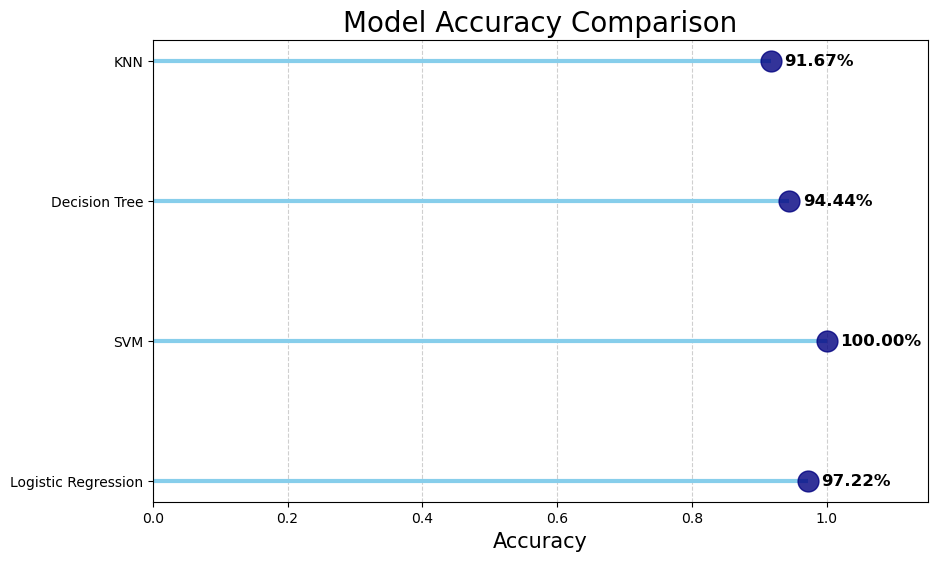

In [24]:
# Create a dictionary of scores
scores = {
    'Logistic Regression': acc_logreg,
    'SVM': acc_svm,
    'Decision Tree': acc_tree,
    'KNN': acc_knn
}

# Create the dataframe
scores_df = pd.DataFrame(list(scores.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))

# 1. Create the stems (The lines)
plt.hlines(y=scores_df['Model'], xmin=0, xmax=scores_df['Accuracy'], color='skyblue', linewidth=3)

# 2. Create the pops (The dots)
plt.plot(scores_df['Accuracy'], scores_df['Model'], "o", markersize=15, color='navy', alpha=0.8)

# 3. Add labels (Optional: Print the score right on the chart)
for index, value in enumerate(scores_df['Accuracy']):
    plt.text(value + 0.02, index, f"{value:.2%}", va='center', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=20)
plt.xlabel('Accuracy', fontsize=15)
plt.xlim(0, 1.15) # Extra space for the text labels
plt.grid(axis='x', linestyle='--', alpha=0.6) # Add a faint grid
plt.show()